In [1]:
setwd("/Users/secg9/Documents/Rappi/")
library ( boot)
library(class)
library(plotROC)
library(ggplot2)
library(ROCR)
set.seed(1)


Warning message:
"package 'plotROC' was built under R version 3.4.4"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'ROCR' was built under R version 3.4.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.4.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [17]:

Ordenes2017<-read.csv('orders.csv')
Ordenes2017

order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken
14364873,30000009,2.4781007,-72.7193604,4200,2017-09-07T20:02:17Z,0
14370123,30000058,0.4517106,37.7547607,4200,2017-09-07T20:13:16Z,0
14368534,900003684,2.0260719,207.1911621,4000,2017-09-07T20:07:23Z,0
14370258,900014452,2.6714317,1.7226562,4400,2017-09-07T20:15:19Z,1
14369923,900014085,0.9654960,117.4291992,3450,2017-09-07T20:12:14Z,1
14367859,900004363,0.5771555,-7.8958740,5200,2017-09-07T20:13:16Z,1
14367634,900006875,2.5580391,4.0861816,4200,2017-09-07T20:07:23Z,0
14369615,900005637,1.1454070,-33.8736572,3200,2017-09-07T20:10:15Z,1
14368621,900007609,1.2187420,132.3422852,4200,2017-09-07T20:14:14Z,1
14367450,900004941,1.2825400,0.7924805,3200,2017-09-07T19:56:22Z,0


In [18]:
#una vista rápida de los datos, observar medias y medianas, valores mínimos y máximos. Lo anterior con el objetivo de tener 
#una idea de como se distribuyen los datos. 
summary(Ordenes2017)

    order_id           store_id         to_user_distance to_user_elevation
 Min.   :14210727   Min.   : 30000003   Min.   :0.0000   Min.   :-598.30  
 1st Qu.:14669688   1st Qu.:900004502   1st Qu.:0.8365   1st Qu.: -18.35  
 Median :15092411   Median :900007725   Median :1.3902   Median :  11.15  
 Mean   :15077178   Mean   :758070797   Mean   :1.5010   Mean   :  26.90  
 3rd Qu.:15473550   3rd Qu.:900012739   3rd Qu.:2.0300   3rd Qu.:  61.02  
 Max.   :15902524   Max.   :900017291   Max.   :9.3602   Max.   :1009.38  
                                                                          
 total_earning                   created_at         taken       
 Min.   :     0   2017-09-23T19:06:05Z:    59   Min.   :0.0000  
 1st Qu.:  4200   2017-09-30T13:39:06Z:    45   1st Qu.:1.0000  
 Median :  5200   2017-09-16T15:24:14Z:    43   Median :1.0000  
 Mean   :  5359   2017-09-29T19:59:14Z:    39   Mean   :0.9212  
 3rd Qu.:  6300   2017-09-30T20:10:16Z:    39   3rd Qu.:1.0000  
 Max.   :1

In [60]:
#respuestas a la pregunta 1 de la parte 3:
# hubo 11580 ordenes no tomadas
# El Sábado fue el día con más porcentaje de ordenes canceladas (el porcentage es proporcional a la cantidad de ordenes)
OrdenesNT<-Ordenes2017[Ordenes20171$taken==0,]
nrow(OrdenesNT)

OrdenesNT$DiaSemana <- weekdays(as.Date.factor(OrdenesNT$created_at))
table(as.factor(OrdenesNT$DiaSemana))

[1] 11580


  domingo    jueves     lunes    martes miércoles    sábado   viernes 
     1441      1468      1325      1590      1297      2577      1882 

In [62]:
OrdenesTNT<-Ordenes2017
OrdenesTNT$DiaSemana <- weekdays(as.Date.factor(OrdenesTNT$created_at))
table(as.factor(OrdenesTNT$DiaSemana))


  domingo    jueves     lunes    martes miércoles    sábado   viernes 
    29739     16379     15017     21120     18655     24835     21242 

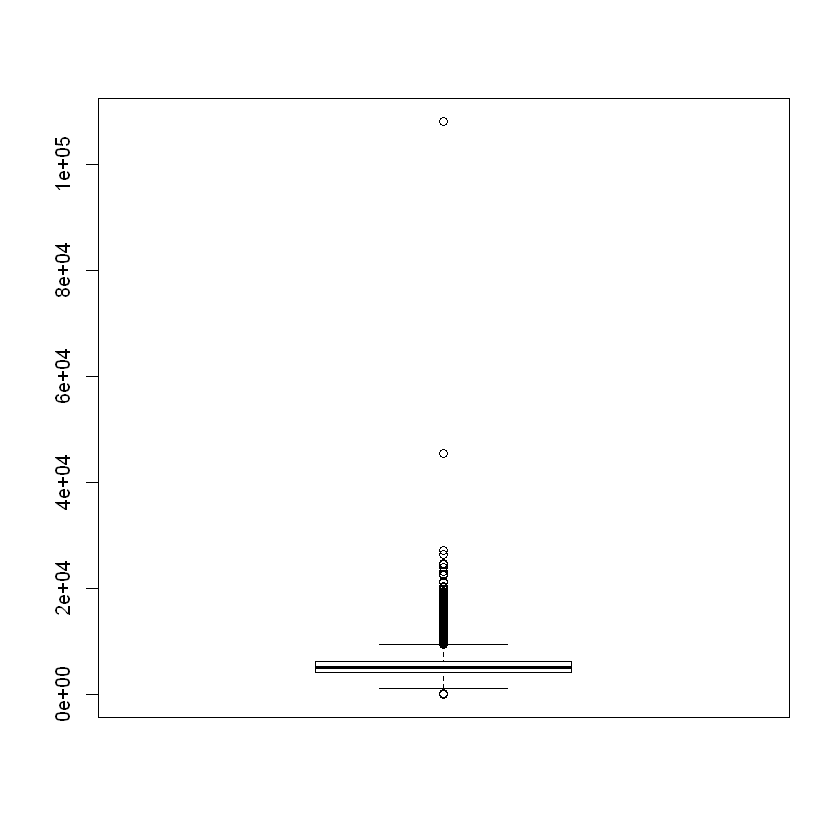

In [20]:
#Un boxplot es bueno para detctar ouliers en este caso dos muy claros
Vector1 <- Ordenes2017$total_earning
boxplot(Vector1)



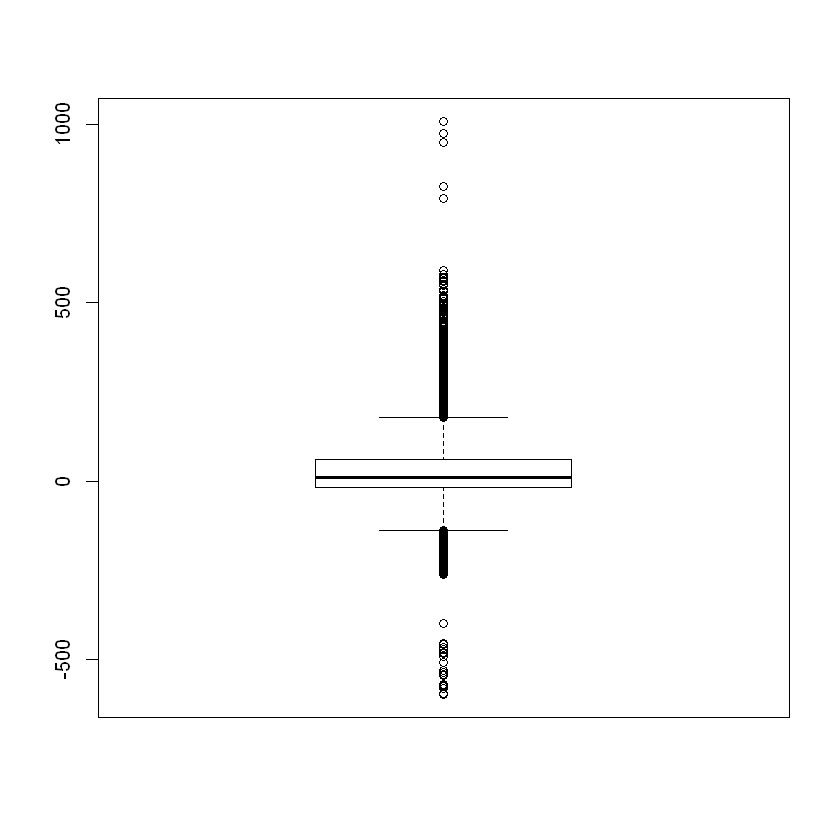

In [22]:
#Un boxplot es bueno para detctar ouliers en este caso 5 que no concuerdan con el rango de los datos, -600 a 600
Vector2 <- Ordenes2017$to_user_elevation
boxplot(Vector2)



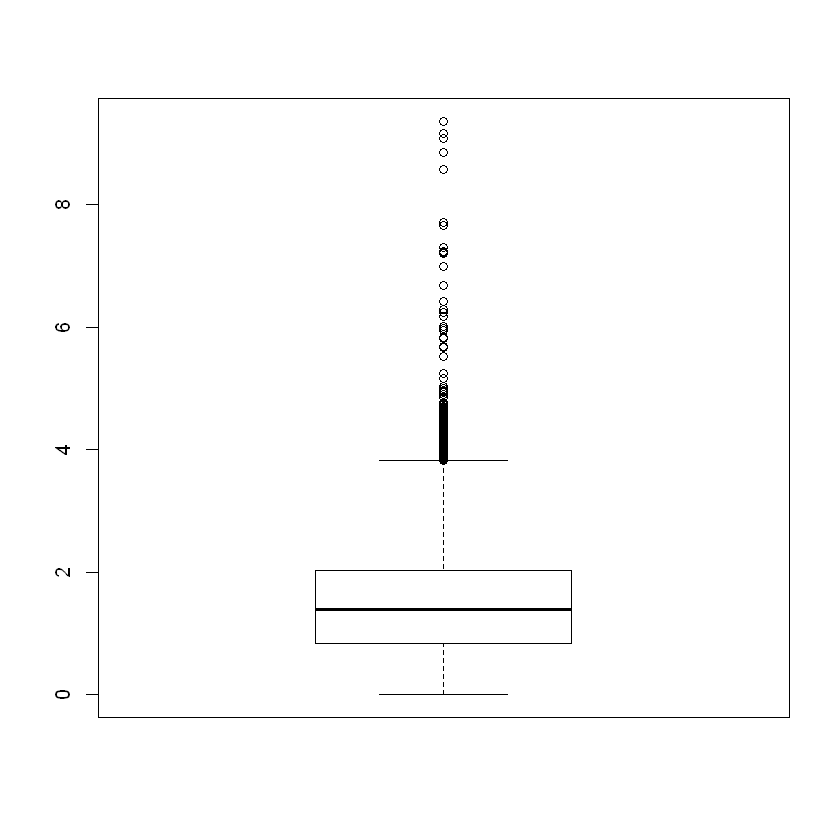

In [23]:
#Un boxplot es bueno para detctar ouliers.
Vector3 <- Ordenes2017$to_user_distance
boxplot(Vector3)



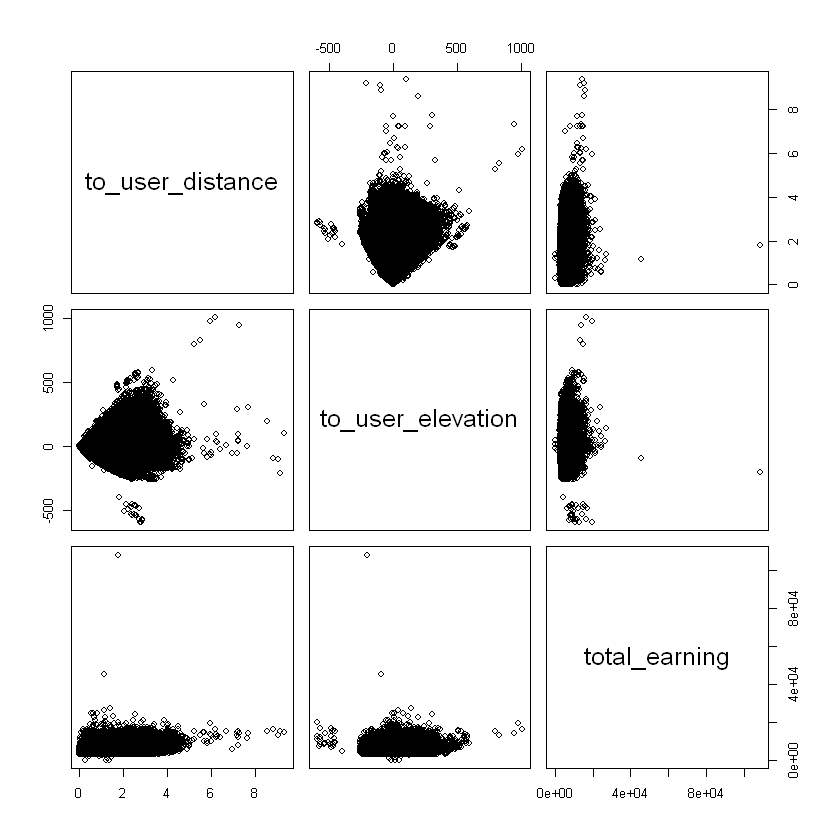

In [24]:
#una matriz de scatter plot da un buen vistazo si hay correlación entre dos variables, esto puede ser útil a la hora de escoger 
#un modelo, en este caso se ve que por ejemplo distancia y ganacia están correlacionadas, así que usar Linear discriminant 
#analysis no es una buena idea.
pairs(Ordenes2017[,3:5])

In [25]:
#dicho lo anterior se procede a limpiar los datos lo primero es asegurarase de qu e no hay entradas duplicadas.
Ordenes20172 <- data.frame(Ordenes2017[,3:5], Ordenes2017$taken)
Ordenes20172= unique(Ordenes20172)
#se remueven los outliers de elevacion
Ordenes20172 = Ordenes20172[Ordenes20172$to_user_elevation<600,]
#se remueven los outliers de ganancia, así cómo el dato inconsistente de gancia 0
Ordenes20172 = Ordenes20172[Ordenes20172$total_earning != 0,]
Ordenes20172 = Ordenes20172[Ordenes20172$total_earning < 30000,]
#se rmeuve el dato incosistente de distancia 0
Ordenes20172 = Ordenes20172[Ordenes20172$to_user_distance != 0,]






In [27]:
#Después del análisis de los datos he decidio implementar dos modelos, ambos antipodales en cuanto a flexibilidad. Primero 
#implementaré el álgoritmo de K-vecinos más cercanos que tiene la ventaja de ser no paramétrico y muy flexible. Este es fácil 
# de implementar y explicar ádemas de ser universalmente consistente(con una muestra los suficentemente grande converge a la 
#función de Bayes) lo cual lo hace muy robusto. No obstante, es costoso computacionalmente además de dar poco control sobre 
#el desempeño de clasificación (más adelante se hablará de esto). Es por ello que adicionalmente elegí implementar 
#una regresión logística y comparar ambos modelos. Adicionalmente decidí no usar los dias de la semana cómo variable predictora
#pues KNN funciona mejor con todas si toda slas variables son continuas, no obstante para un trabajo fúturo es algo a tener en 
#cuenta.



#división de los datos de entrenamiento y prueba, se entrenará con dos tercios de los datos y se validara con el tercio restante.
test = as.numeric(rownames(Ordenes20172))%%3 ==0

Ordenes.test <- Ordenes20172[test, ]
Ordenes.train <- Ordenes20172[!test,]

#es bueno estandarizar los datos para implementar K-nn.
Ordenes.trainS <- Ordenes.train
Ordenes.trainS[1:3] = scale(Ordenes.trainS[1:3])

Ordenes.testS <- Ordenes.test
Ordenes.testS[1:3] = scale(Ordenes.testS[1:3])

In [ ]:
#Con el fin de escoger el número de vecinos se implmenta el siguiente bucle. El código se compilo en otra máquina debido a su
#costo computacional.
errores = 1:50

for (i in 1:50)
{
print(i)
knn.pred = knn(Ordenes.trainS, Ordenes.testS, Ordenes.trainS$Ordenes20171.taken, k = i)
errores[i] = mean(knn.pred != Ordenes.testS$Ordenes20171.taken)
}


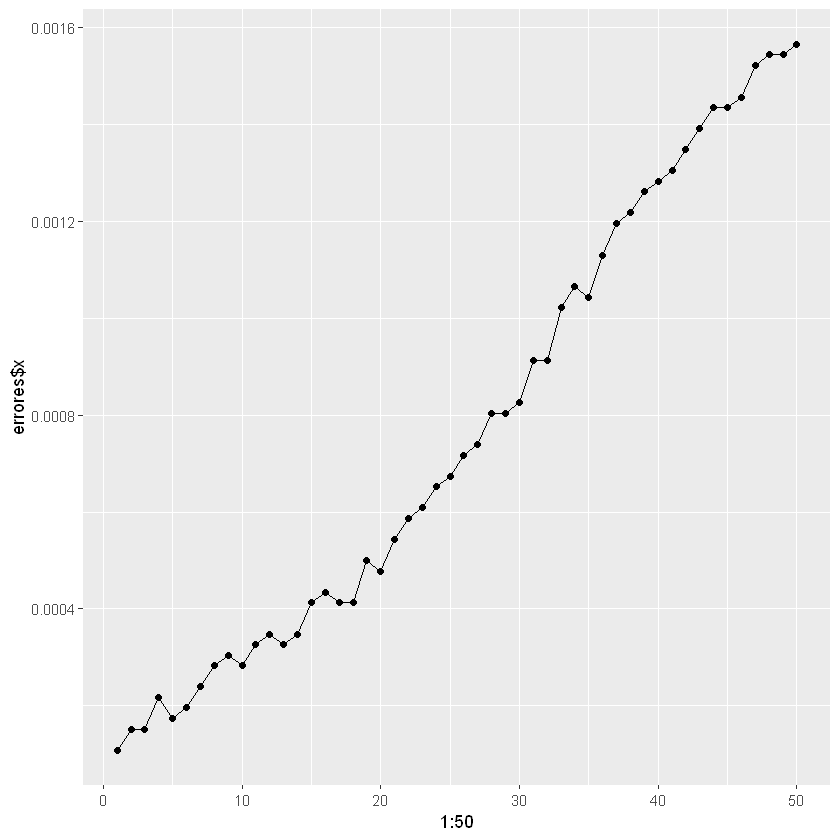

In [36]:
#Como se puede ver 5 vecins es una cantidad óptima para usar el álgoritmo, pues tiene un error de entrenamiento bajo pero  
# alejado de aquel con 1 vecino( que se acerca al overfitting) y no es tan costoso computacionalmente. Desafortunademente
# no se ve un "codo" claro que reduzca el error a medida que se aumentan los vecinos.
errores <- read.csv('errores.csv')
qplot(1:50, errores$x, geom=c("point", "line"))

In [42]:
#usando el lote de validación se observa que el álgoritmo tiene un error muy bajo. Quería usar K-fold cross validation pero 
#el costo computacional era muy alto para mi computador. 

knn.pred = knn(Ordenes.trainS, Ordenes.testS, Ordenes.trainS$Ordenes2017.taken, k = 5)
error = mean(knn.pred != Ordenes.testS$Ordenes2017.taken)
error

[1] 0.0002173488

In [ ]:
#Es aquí dónde quiero discutir porque elegí tambien implementar un a regresión logística. Si bien K-nn es muy flexible y hace 
# uso de pocos supuestos, se tiene  poco control sobre su desempeño(prueba de ello es el aumento de errores en la gráfica anterior).
# Por otra parte es muy costoso computacionalmente, así que quizá si este ejercicio hubiera sido con una base de datos más grande
#este enfoque no hubiera sido posible.

In [46]:
#A continuación se implmentará una regresión logística. Este método crea una frontera de clasificación lineal, no obstante
#lo que se pierde con simplesa se gana en interpretabilidad, hay mucho control sobre el modelo. Se implementara validacion
#cruzada para calcualar el error de validación y además se hará un análisis de desempeño de clasificación. 

y = Ordenes20172$Ordenes20171.taken
x1 = Ordenes20172$to_user_distance  
x2 = Ordenes20172$to_user_elevation
x3 = Ordenes20172$total_earning


colnames(Ordenes20172)<- c('x1','x2','x3','y')


fit <- glm(y~ x1 +x2 +x3, data = Ordenes20172)
cv.error = cv.glm(glmfit = fit, data = Ordenes20172,K=5)

cv.error$delta


[1] 0.07477552 0.07477500

In [47]:
#gracias al bajo costo computacional de glm, se puede usar remuestreo para su validación: K-fold cross validation.
cv.error = cv.glm(glmfit = fit, data = Ordenes20172,K=10)

cv.error$delta

[1] 0.07477695 0.07477663

In [48]:
#haciendo primero 5, 10 y finalmente 15 grupos para validacion cruzada y observando poco cambio en el error, se puede exponer
#la cifra de 7% como error de validación. cifra baja pero alta comparada con el error del método K-nn.
cv.error = cv.glm(glmfit = fit, data = Ordenes20172,K=15)

cv.error$delta

[1] 0.07477561 0.07477545

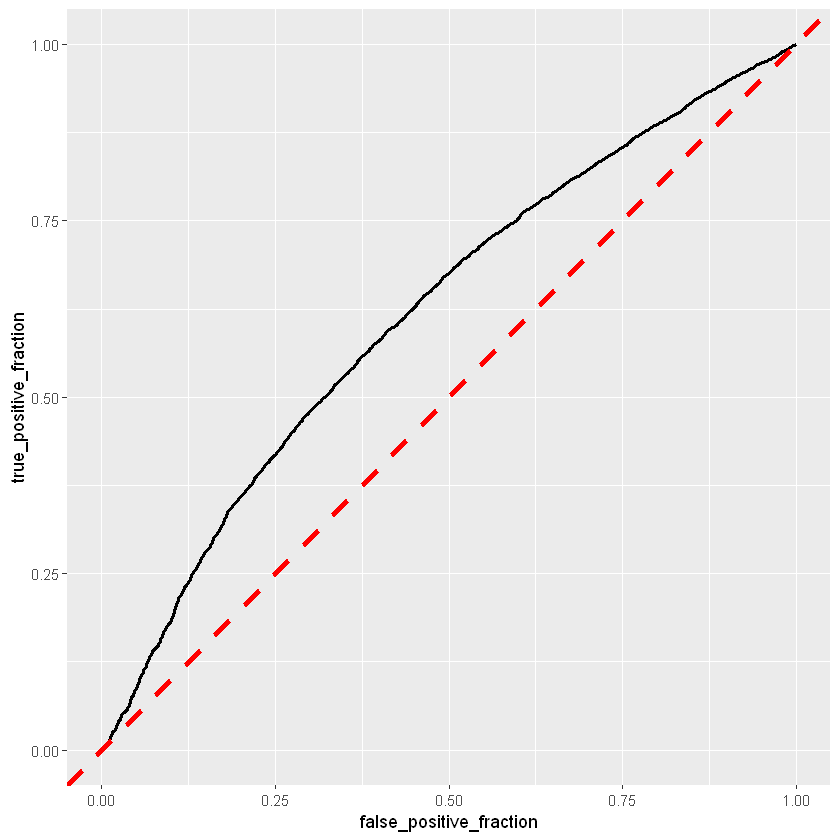

In [54]:
#Es momento de hablar del desempeño de clasificación, si bien decidí usar el error de validación como indicador de desempeño del
#modelo, hay varios tipos de errores en partícular no se ha de omitir el error de entrenamiento como un buen indicador. Sin 
#embargo una ventaja de la regresión logística (y del problema que es una clasificación binaria) es que se puede hablar de 
#falso positivo y falso negativo. ESta distinción entre error total y estos errores puede ser de gran importancia para este
#caso particular. ¿Que produce más perdida para rappi? ¿apostar por un courier que al final cancelará el envio? o perder un 
#potencial courier porque el algoritmo lo clasificó como alguien que cancelará. La respuesta requiere un análisis más allá del 
#alcance de este trabajo pero el poder hacer la pregunta es de gran utilidad. 
#Una regresión logistica estima la cantidad p(Y=1|X), para clasificar s establece un c constante tal que si p(Y=1|X)>c entonces
#el Y estimado será uno. Dependiendo del valor del c se hará un sesgo a al hora de clasificar que disminuira el número de falsos positivos
#o de falsos negativos según el caso. En esta celda está el código para graficar una curva  ROC, una curva ROC es una forma 
# de vizualizar que tan bueno es un clasificador en función de sus falsos positivos o falsos negativos. La curva está pintada en el espacio ROC, 
#el eje y es la "sensitivty" o True positive rate = verdaderos positivos/positivos predecidos  y el eje x es "specificity" o 
#false positive rate = falsos positivos / verdaderos negativos. Cada punto en la curva representa para un determinado c cual es su
#valor de True positive rate y su False positive rate. La manera de leer la gráfica es entre más área tenga la curva mejor clasificador es, la curva perfecta sería si la curva es (0,0)
# y posteriormente (x,1).


y = Ordenes.train$Ordenes20171.taken
x1 = Ordenes.train$to_user_distance  
x2 = Ordenes.train$to_user_elevation
x3 = Ordenes.train$total_earning

colnames(Ordenes.test)<- c('x1','x2','x3','y')
colnames(Ordenes.train)<- c('x1','x2','x3','y')

fit2 <- glm(y~ x1 +x2+x3 , data = Ordenes.train)

df <- data.frame(predictor = predict(object = fit2, newdata = Ordenes.test),
                       known.truth = Ordenes.test$y)

ggplot(df, aes(d = known.truth, m = predictor)) + 
  geom_roc(n.cuts = 0) + geom_abline(intercept = 0, slope = 1, color="red", 
                                   linetype="dashed", size=1.5)



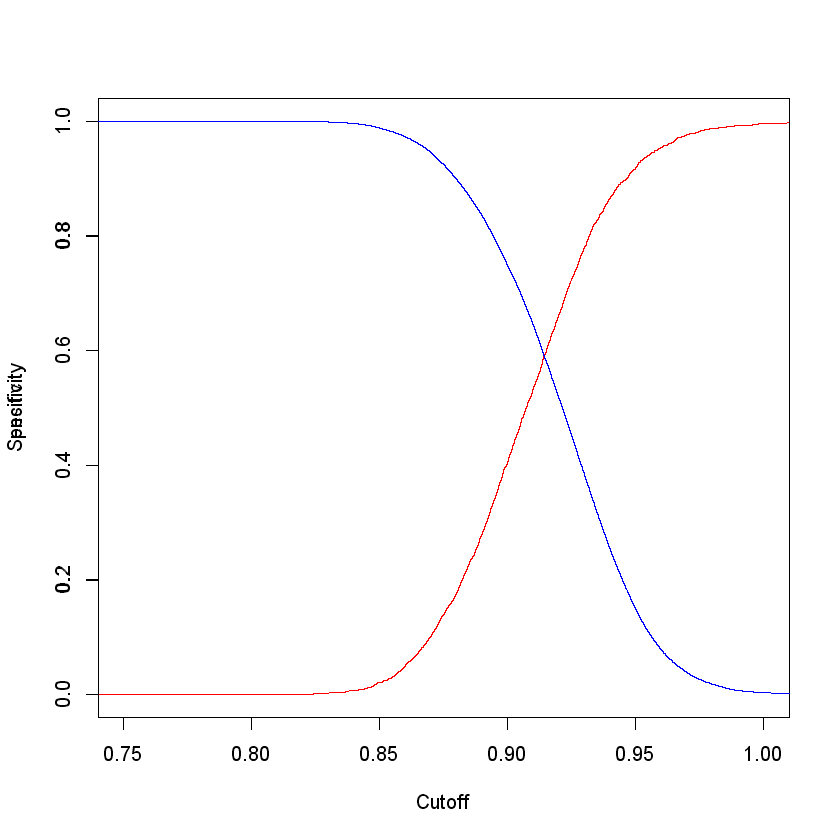

In [59]:
#Se puede llegar a incluso más granularidad, la siguiente son curvas de el TPR(azul) y el FPR(rojo) en función del c mencionado en la celda 
#anterior el punto que minimiza el true positive rate y el false positive rate es el cruce entre las dos curvas. Sin embargo, dependiendo
# de la respuesta a las preguntas, ¿Que produce más perdida para rappi? ¿apostar por un courier que al final cancelará el envio? o perder un 
#potencial courier porque el algoritmo lo clasificó como alguien que cancelará, se puede optar por un diferente corte. 
#Con el álgoritmo de vecinos más cercanos se puede hacer algo parecido en función del K(como aquí es en función del c) 
#pero no necesarimaente da una curva que aumenta o disminuye, así que no es útil para ajustar el sesgo del álgoritmo. 
pred= prediction(predict(object = fit2, newdata = Ordenes.test), Ordenes.test$y)

perfspec <- performance(prediction.obj = pred, measure="spec", x.measure="cutoff")

plot(perfspec,xlim=c(0.75, 1), col="red", yaxt="Spece")

par(new=TRUE)


perfsens <- performance(prediction.obj = pred, measure="sens", x.measure="cutoff")

plot(perfsens,xlim=c(0.75, 1),col="blue")



Este último cuadro es dedicado a las conclusiones finales. Primero, desde un punto de vista técnico en este ejercicio se mostraron las dos caras de la moneda del aprendizaje estadístico. Si bien la curva ROC mostró que la regresión logística tiene mucho sesgo, es este mismo sesgo el que se puede manipular para poder evitar alguno de los dos errores de clasificación. Cito por tercera vez las preguntas : ¿Que produce más perdida para rappi? ¿apostar por un courier que al final cancelará el envio? o perder un potencial courier porque el algoritmo lo clasificó como alguien que cancelará. La otra cara es el algoritmo de K- vecino más cercanos, totalmente no paramétrico y con un error de validación muy bajo, no obstante la grafica de error en función d elso vecinos muestra que a pesar del oco sesgo hay mucha varianza en sus predicciones y por lo tanto es difiíl de controlar y por ende manipular para mejorar su desempeño. Al final rappi se puede v¿beneficiar de ambos puntos de vista, cuál de los dos tomar dependerá de la situación del momento particular del negocio. Para concluir , como es parte del ejercicio tomar una decisión, presentaria estos resultados como:
Usaría el álgoritmo de KNN cómo referencia, para tener una idea de como asignar las ordenes y si no hay circunstancias especiales lo usaría como el álgoritmo que asigna las ordenes nuevas.
No obstante dependiendo de mas variables financieras o geográficas, siempre tendría la regresión logística a dispocisión en caso de que haya que hacer un sesgo para evitar alguno de los errores de clasificación, bien sea el de falsos positivos o el de falsos negativos.